***fusion des datasets***::

>



In [ ]:
print(f"Nombre de lignes dans df_vinted : {df_apple.shape[0]}")
print(df_apple.head())  # Voir si des avis existent


Nombre de lignes dans df_vinted : 3816
   Note                Date  \
0     1 2025-01-08 20:18:34   
1     1 2025-01-05 23:00:52   
2     1 2024-12-10 19:19:34   
3     1 2024-11-04 14:02:30   
4     1 2024-10-13 16:57:40   

                                                Avis       Source  
0  J’ai commencée à utiliser Vinted il y a un peu...  Apple Store  
1  Premier compte inaccessible du jour au lendema...  Apple Store  
2  Quand la vente ou l’achat se passe bien tout v...  Apple Store  
3                                           Bonjour,  Apple Store  
4  C'est vraiment une application de m****!! On a...  Apple Store  


In [ ]:
# Afficher le nombre d'avis pour chaque dataset
print(f"Nombre d'avis Apple : {df_apple.shape[0]}")
print(f"Nombre d'avis Vinted : {df_vinted.shape[0]}")


Nombre d'avis Apple : 3816
Nombre d'avis Vinted : 282711


In [ ]:
# Vérifier le nombre de lignes de chaque DataFrame
print(f"Nombre de lignes Vinted : {len(df_vinted)}")
print(f"Nombre de lignes Apple : {len(df_apple)}")

# Fusionner les deux DataFrames
df_combined = pd.concat([df_vinted, df_apple], ignore_index=True)

# Afficher le nombre total de lignes après fusion
print(f"Nombre total d'avis après fusion : {len(df_combined)}")


Nombre de lignes Vinted : 282711
Nombre de lignes Apple : 3816
Nombre total d'avis après fusion : 286527


In [ ]:
import pandas as pd

# Charger les fichiers
file_apple = "apple_store_reviews_fr_final.xlsx"
file_vinted = "vinted_google_finalv2.xlsx"

# Charger les datasets avec colonnes spécifiques
df_apple = pd.read_excel(file_apple, usecols=["Note", "Date", "Avis"])
df_vinted = pd.read_excel(file_vinted, usecols=["Note", "Date", "avis"])

# Renommer la colonne "avis" pour correspondre au format Apple
df_vinted = df_vinted.rename(columns={"avis": "Avis"})

# Ajouter une colonne "Source" pour identifier la provenance
df_apple["Source"] = "Apple Store"
df_vinted["Source"] = "Vinted"

# Vérifier et convertir les dates au format datetime
df_apple["Date"] = pd.to_datetime(df_apple["Date"], errors='coerce')
df_vinted["Date"] = pd.to_datetime(df_vinted["Date"], errors='coerce')

# Normalisation des notes (si besoin)
df_apple["Note"] = pd.to_numeric(df_apple["Note"], errors='coerce')
df_vinted["Note"] = pd.to_numeric(df_vinted["Note"], errors='coerce')

# Fusionner les deux datasets
df_combined = pd.concat([df_apple, df_vinted], ignore_index=True)

# Suppression des lignes avec valeurs manquantes dans les colonnes essentielles
df_combined = df_combined.dropna(subset=["Note", "Date", "Avis"])

# Vérifier le résultat
print(f"Nombre total d'avis après nettoyage : {df_combined.shape[0]}")
print(df_combined.head())

# Affichage des statistiques de base
print("\nStatistiques des notes :")
print(df_combined["Note"].describe())

# Vérifier les valeurs nulles restantes
print("\nValeurs manquantes par colonne :")
print(df_combined.isnull().sum())


Nombre total d'avis après nettoyage : 286452
   Note                Date  \
0     1 2025-01-08 20:18:34   
1     1 2025-01-05 23:00:52   
2     1 2024-12-10 19:19:34   
3     1 2024-11-04 14:02:30   
4     1 2024-10-13 16:57:40   

                                                Avis       Source  
0  J’ai commencée à utiliser Vinted il y a un peu...  Apple Store  
1  Premier compte inaccessible du jour au lendema...  Apple Store  
2  Quand la vente ou l’achat se passe bien tout v...  Apple Store  
3                                           Bonjour,  Apple Store  
4  C'est vraiment une application de m****!! On a...  Apple Store  

Statistiques des notes :
count    286452.000000
mean          4.655485
std           0.911065
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Note, dtype: float64

Valeurs manquantes par colonne :
Note      0
Date      0
Avis      0
Source    0
dtype: int64


In [ ]:
df_apple = df_apple[['Note', 'Date', 'Avis']]
print(df_apple.head())  # Vérifie que seules les bonnes colonnes sont présentes


   Note                Date                                               Avis
0     1 2025-01-08 20:18:34  J’ai commencée à utiliser Vinted il y a un peu...
1     1 2025-01-05 23:00:52  Premier compte inaccessible du jour au lendema...
2     1 2024-12-10 19:19:34  Quand la vente ou l’achat se passe bien tout v...
3     1 2024-11-04 14:02:30                                           Bonjour,
4     1 2024-10-13 16:57:40  C'est vraiment une application de m****!! On a...


In [ ]:
import pandas as pd

# Charger les fichiers
file_apple = "apple_store_reviews_fr_final.xlsx"
file_vinted = "vinted_google_finalv2.xlsx"

# Charger les datasets
df_apple = pd.read_excel(file_apple, usecols=["Note", "Date", "Avis"])
df_vinted = pd.read_excel(file_vinted, usecols=["Note", "Date", "avis"])

# Renommer la colonne "avis" de Vinted pour correspondre à Apple
df_vinted = df_vinted.rename(columns={"avis": "Avis"})

# Fusionner les deux datasets
df_combined = pd.concat([df_apple, df_vinted], ignore_index=True)

# Vérifier le résultat
print(f"Nombre total d'avis après fusion : {df_combined.shape[0]}")
print(df_combined.head())


Nombre total d'avis après fusion : 332381
   Note                 Date  \
0   1.0  2025-01-08 20:18:34   
1   1.0  2025-01-05 23:00:52   
2   1.0  2024-12-10 19:19:34   
3   1.0  2024-11-04 14:02:30   
4   1.0  2024-10-13 16:57:40   

                                                Avis  
0  J’ai commencée à utiliser Vinted il y a un peu...  
1  Premier compte inaccessible du jour au lendema...  
2  Quand la vente ou l’achat se passe bien tout v...  
3                                           Bonjour,  
4  C'est vraiment une application de m****!! On a...  


# **Analyse descripitve**

In [ ]:
!pip install wordcloud matplotlib pandas numpy


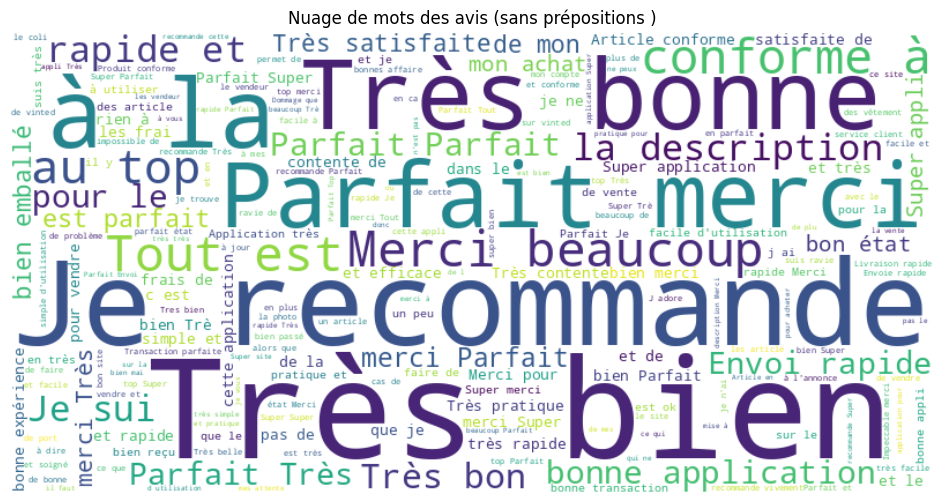

In [ ]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

text_corpus = " ".join(df_combined['Avis'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des avis (sans prépositions )")
plt.show()



In [ ]:
# Exemple: calcul de la longueur moyenne (en nombre de mots) pour chaque note
df_combined['Avis_length'] = df_combined['Avis'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Calculer la moyenne par note
average_length_by_note = df_combined.groupby('Note')['Avis_length'].mean()


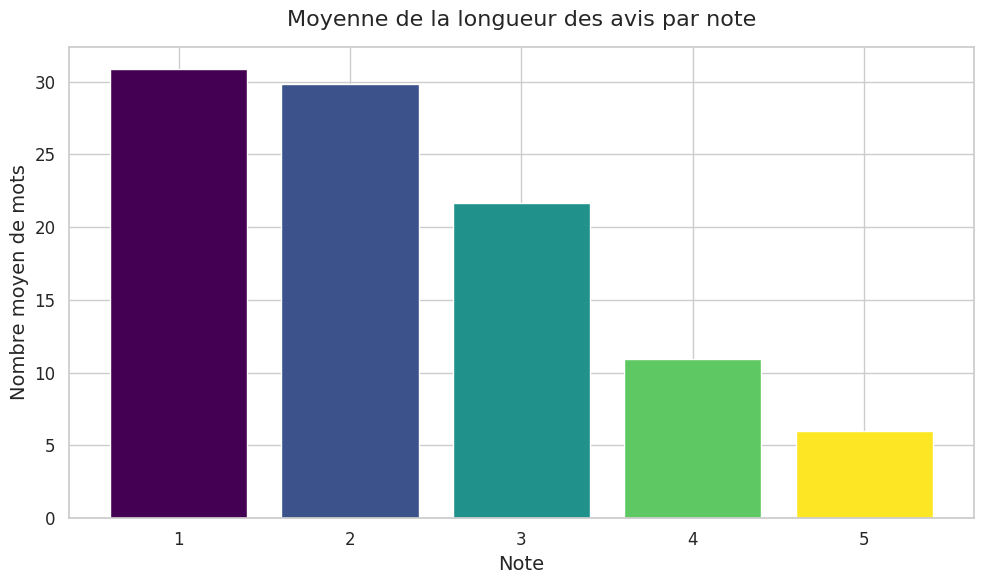

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de données (Series) : moyenne de longueur par note
# average_length_by_note = pd.Series({1.0: 12.5, 2.0: 18.3, 3.0: 22.7, 4.0: 30.1, 5.0: 45.2})

# 1. Convertir les index (notes) en entiers pour supprimer le .0
average_length_by_note.index = average_length_by_note.index.astype(int)

# 2. Définir un style global Seaborn
sns.set_theme(style="whitegrid")

# 3. Créer la figure et les couleurs
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(average_length_by_note)))

# 4. Tracer le bar chart avec Matplotlib
plt.bar(average_length_by_note.index, average_length_by_note.values, color=colors)

# 5. Personnaliser le titre et les axes
plt.title("Moyenne de la longueur des avis par note", fontsize=16, pad=15)
plt.xlabel("Note", fontsize=14)
plt.ylabel("Nombre moyen de mots", fontsize=14)

# 6. Ajuster la rotation des étiquettes de l’axe X (si nécessaire)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 7. Améliorer la mise en page
plt.tight_layout()

# 8. Afficher le graphique
plt.show()


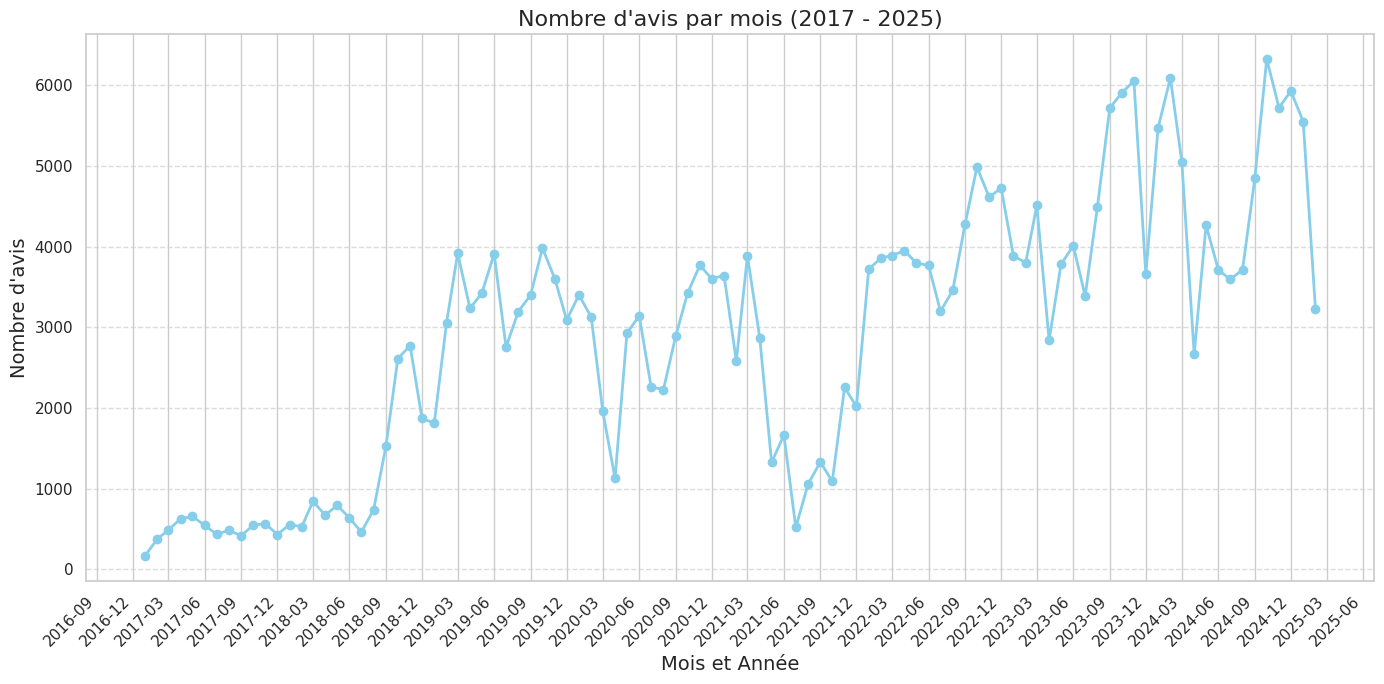

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filtrer les dates et forcer une copie
df_combined = df_combined[
    (df_combined['Date'] >= '2017-01-01') &
    (df_combined['Date'] <= '2025-12-31')
].copy()

# Supprimer l'horaire en normalisant la date (heure à 00:00:00)
df_combined.loc[:, 'Date'] = df_combined['Date'].dt.normalize()

# Extraire le mois et l'année pour regrouper les avis
df_combined['MoisAnnee'] = df_combined['Date'].dt.to_period('M')
avis_par_mois = df_combined.groupby('MoisAnnee').size()

# Convertir le PeriodIndex en DatetimeIndex (début du mois)
avis_par_mois.index = avis_par_mois.index.to_timestamp()

# Création du graphique temporel (line chart)
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(avis_par_mois.index, avis_par_mois, marker='o', color='skyblue', linewidth=2)

# Formater l'axe des x pour afficher "YYYY-MM"
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # un tick tous les 3 mois
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')

ax.set_title("Nombre d'avis par mois (2017 - 2025)", fontsize=16)
ax.set_xlabel("Mois et Année", fontsize=14)
ax.set_ylabel("Nombre d'avis", fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


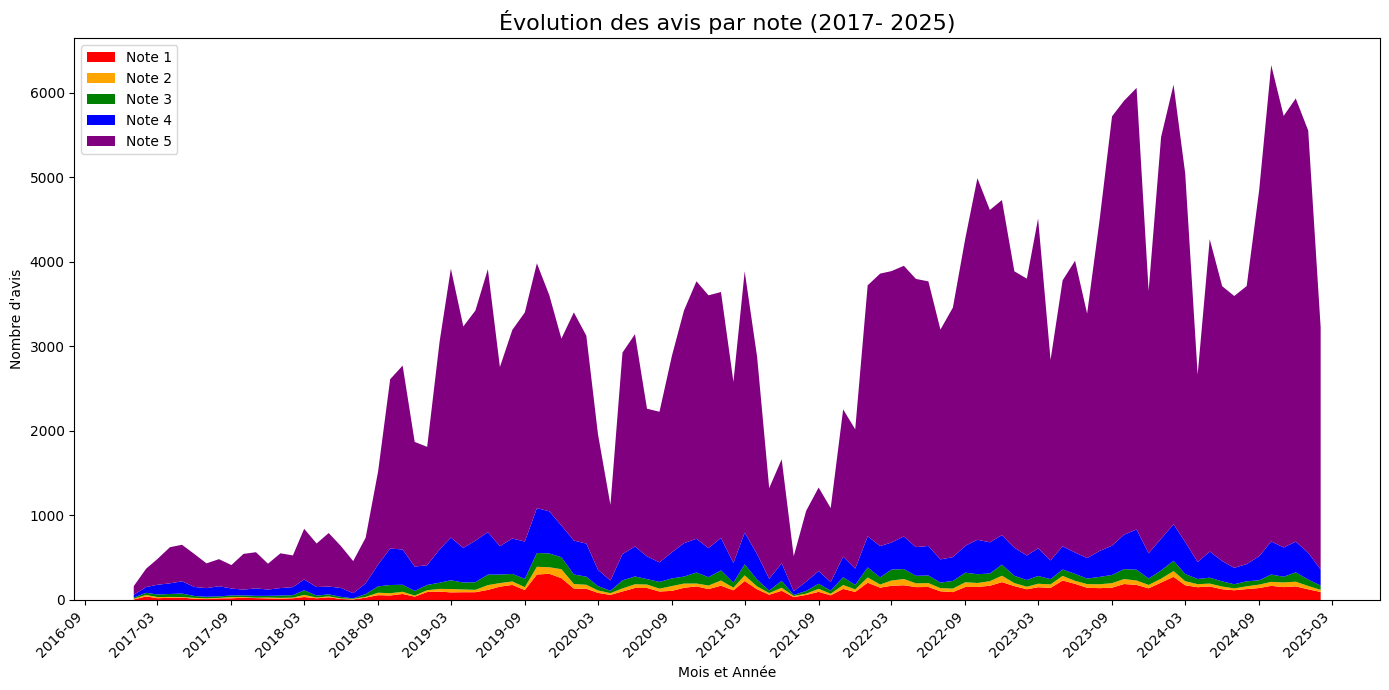

In [ ]:
plt.figure(figsize=(14, 7))
plt.stackplot(
    avis_par_note.index,
    avis_par_note[1],
    avis_par_note[2],
    avis_par_note[3],
    avis_par_note[4],
    avis_par_note[5],
    labels=["Note 1", "Note 2", "Note 3", "Note 4", "Note 5"],
    colors=["red", "orange", "green", "blue", "purple"]
)
plt.title("Évolution des avis par note (2017- 2025)", fontsize=16)
plt.xlabel("Mois et Année")
plt.ylabel("Nombre d'avis")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note 1.0:
   sans aucune raison: 106
   compte a bloqué: 85
   compte bloqué sans: 83
   dernière mise jour: 81
   service client inexistant: 80
Note 2.0:
   dernière mise jour: 42
   très bon état: 41
   depuis dernière mise: 33
   tout va bien: 28
   mise a jour: 27
Note 3.0:
   très bonne application: 79
   très bon état: 76
   dernière mise jour: 40
   depuis mise jour: 38
   tout va bien: 36
Note 4.0:
   très bonne application: 498
   très bonne appli: 227
   très bien très: 226
   très bon état: 196
   bien très bien: 165
Note 5.0:
   très bonne application: 2633
   très bon état: 2146
   parfait très bien: 2033
   très bien parfait: 1789
   très bien merci: 1763


<ipython-input-32-1102a6bcf3f1>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(phrases), ax=axes[i], palette='viridis')
<ipython-input-32-1102a6bcf3f1>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(phrases), ax=axes[i], palette='viridis')
<ipython-input-32-1102a6bcf3f1>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(phrases), ax=axes[i], palette='viridis')
<ipython-input-32-1102a6bcf3f1>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

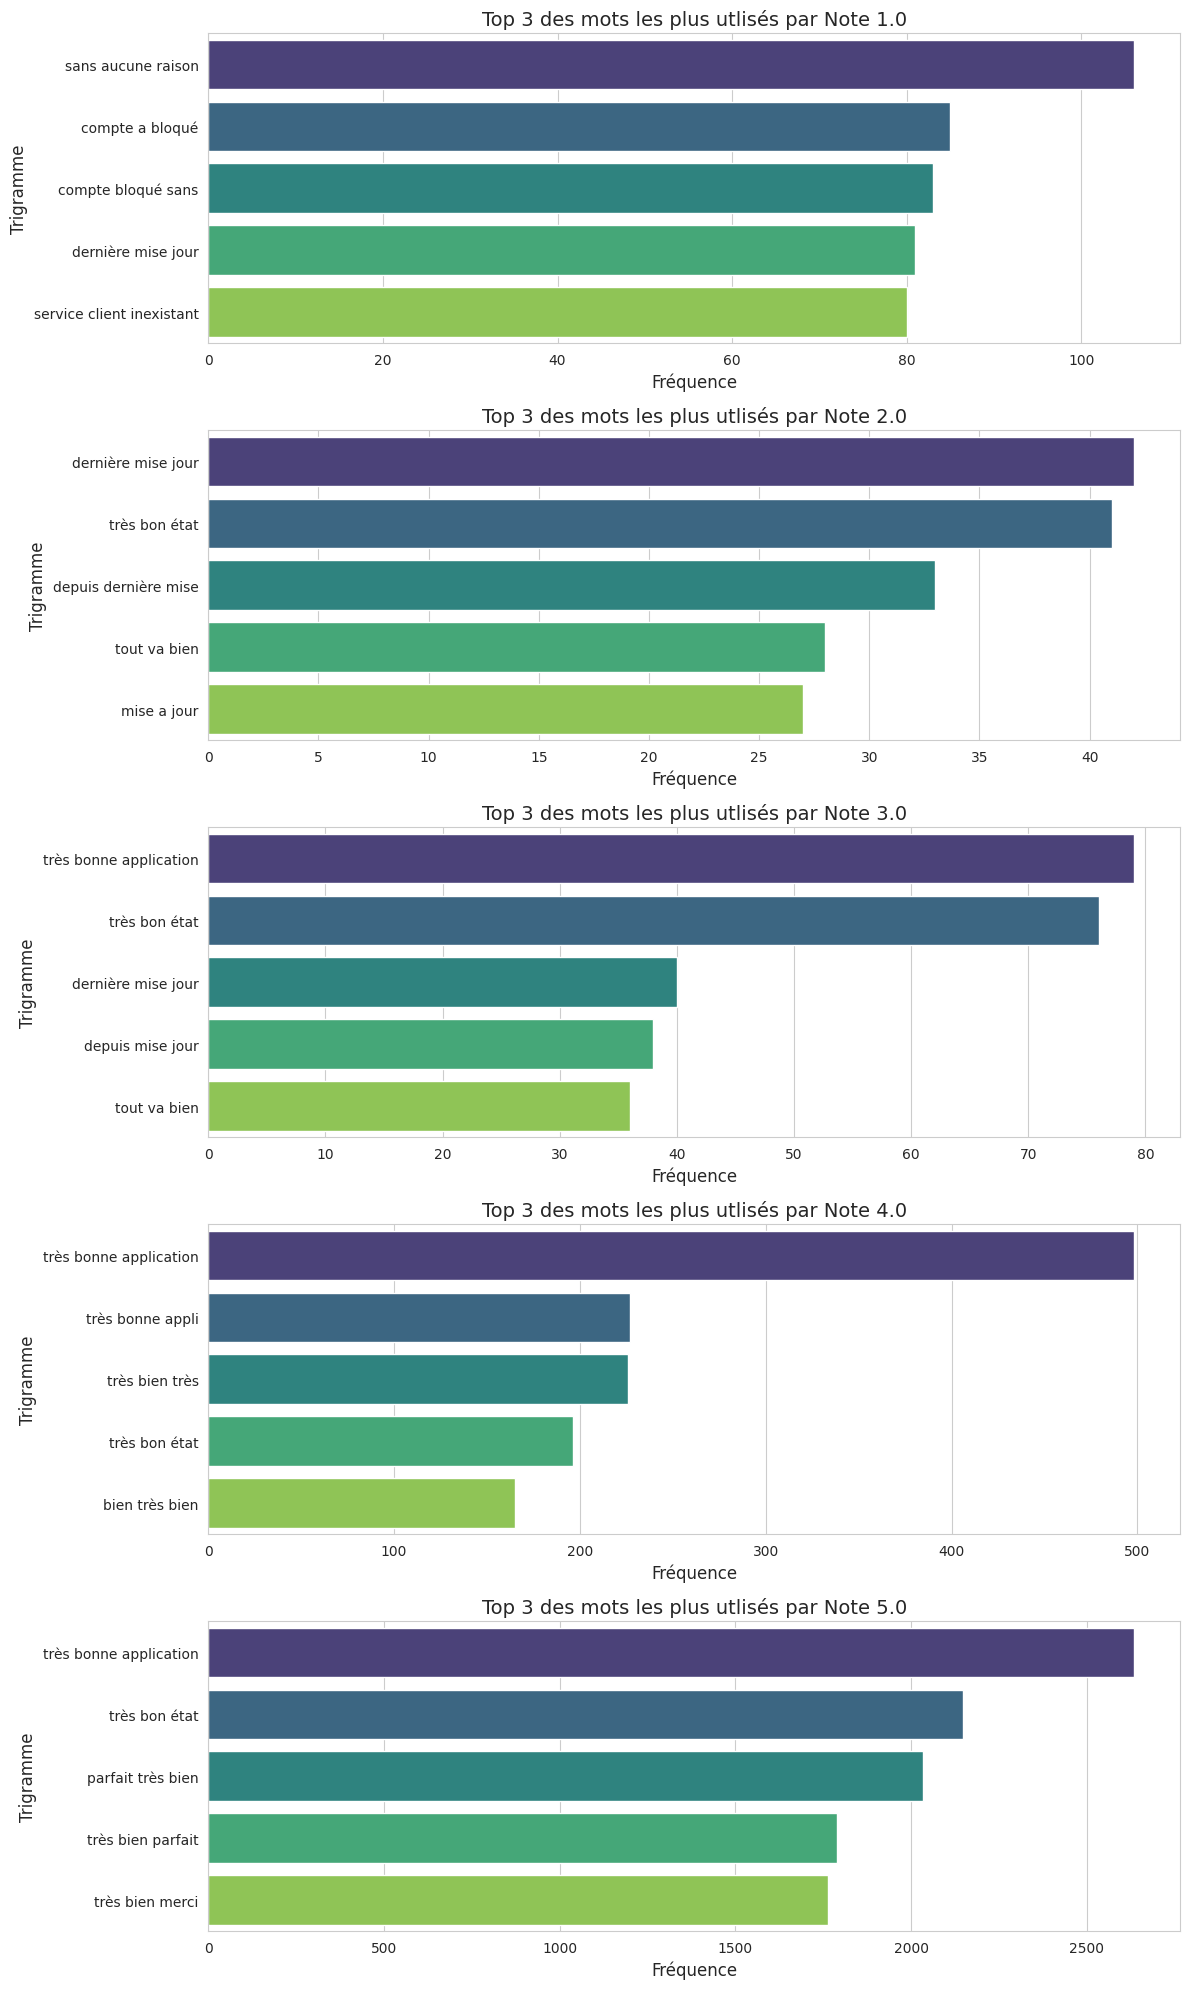

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assurer que les ressources nécessaires sont téléchargées
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Définir les stopwords et mots à exclure
stop_words = set(stopwords.words('french'))
extra_stopwords = {"vinted"}  # à ajuster si nécessaire

def get_top_ngrams(text, n=3, top_k=5):
    """
    Extrait les top_k n-grammes (par défaut trigrammes) les plus fréquents d'un texte.
    Le texte est converti en minuscules, tokenisé et filtré pour supprimer la ponctuation et les stopwords.
    """
    # Convertir le texte en minuscules
    text = text.lower()
    # Tokeniser le texte
    tokens = nltk.word_tokenize(text)
    # Conserver uniquement les tokens alphabétiques et non-stopwords
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words and token not in extra_stopwords]
    # Générer les n-grammes
    n_grams = list(ngrams(tokens, n))
    # Transformer chaque n-gramme en chaîne de caractères
    n_grams = [' '.join(gram) for gram in n_grams]
    # Compter les occurences et retourner les top_k
    n_gram_counts = Counter(n_grams)
    return n_gram_counts.most_common(top_k)

# Calculer les top trigrammes pour chaque note
top_ngrams_per_note = {}
for note, group in df_combined.groupby('Note'):
    all_text = " ".join(group['Avis'].dropna().astype(str))
    top_ngrams = get_top_ngrams(all_text, n=3, top_k=5)
    top_ngrams_per_note[note] = top_ngrams

# Afficher les résultats dans la console (optionnel)
for note in sorted(top_ngrams_per_note.keys()):
    print(f"Note {note}:")
    for phrase, count in top_ngrams_per_note[note]:
        print(f"   {phrase}: {count}")

# Visualisation : un sous-graphe par note
notes = sorted(top_ngrams_per_note.keys())
n_plots = len(notes)

# Définir un style pour un rendu plus esthétique
sns.set_style("whitegrid")
fig, axes = plt.subplots(n_plots, 1, figsize=(12, 4 * n_plots), sharex=False)

# Si une seule note, forcer axes à être une liste
if n_plots == 1:
    axes = [axes]

for i, note in enumerate(notes):
    # Extraire les phrases et leur fréquence
    phrases, counts = zip(*top_ngrams_per_note[note])
    sns.barplot(x=list(counts), y=list(phrases), ax=axes[i], palette='viridis')
    axes[i].set_title(f"Top 3 des mots les plus utlisés par Note {note}", fontsize=14)
    axes[i].set_xlabel("Fréquence", fontsize=12)
    axes[i].set_ylabel("Trigramme", fontsize=12)
    # Affiner l'affichage des étiquettes
    for label in axes[i].get_yticklabels():
        label.set_fontsize(10)

plt.tight_layout()
plt.show()


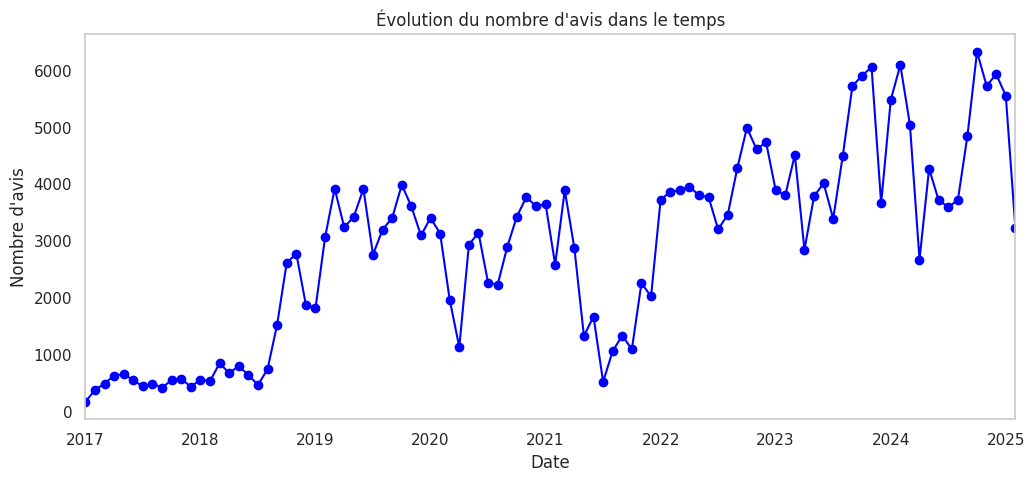

In [ ]:
# Vérifier si la colonne "Date" est bien au format datetime
df_combined['Date'] = pd.to_datetime(df_combined['Date'], errors='coerce')

# Regrouper par mois et compter le nombre d'avis
df_time_series = df_combined.groupby(df_combined['Date'].dt.to_period('M')).size()

# Tracer le graphique
plt.figure(figsize=(12, 5))
df_time_series.plot(kind='line', marker='o', color='blue')
plt.title("Évolution du nombre d'avis dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'avis")
plt.grid()
plt.show()


<ipython-input-24-a9de0c8ced71>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Source", y="Note", data=df_combined, palette="coolwarm", inner="quartile")


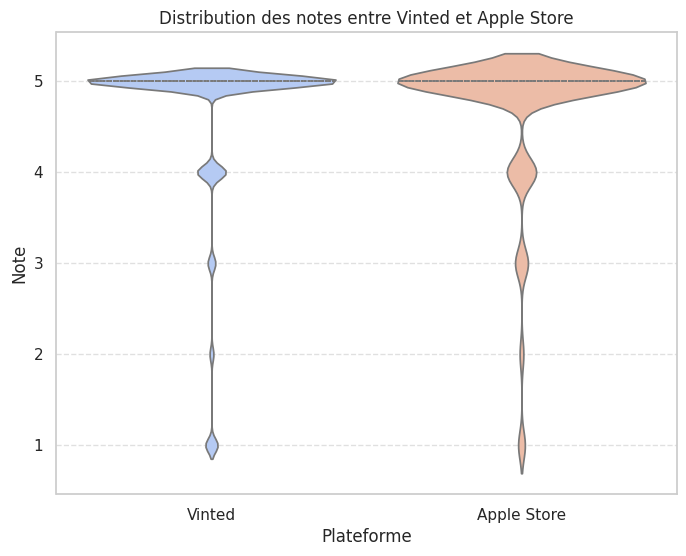

In [ ]:
plt.figure(figsize=(8, 6))

# Violin plot pour voir la densité des notes
sns.violinplot(x="Source", y="Note", data=df_combined, palette="coolwarm", inner="quartile")

plt.title("Distribution des notes entre Vinted et Apple Store")
plt.xlabel("Plateforme")
plt.ylabel("Note")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
